In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np

import warnings
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [0]:
# read data from the data storage
# i've uploaded the data into databricks community at first. 
Incidents_data_text = sc.textFile('/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
#prepare data 
Incidents_df = Incidents_data_text.map(lambda line: [x.strip('"') for x in next(reader([line]))])
#get header
header = Incidents_df.first()
print(header)

#remove the first line of data
Incidents = Incidents_df.filter(lambda x: x != header)

#get the first line of data
display(Incidents.take(3))

#get the total number of data 
Incidents.count()

['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'location', 'SF Find Neighborhoods 2 2', 'Current Police Districts 2 2', 'Current Supervisor Districts 2 2', 'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2', 'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2', 'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2', 'DELETE - 2017 Fix It Zones 2 2', 'Civic Center Harm Reduction Project Boundary 2 2', 'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2', 'Fix It Zones as of 2018-02-07 2 2', 'CBD, BID and GBD Boundaries as of 2017 2 2', 'Areas of Vulnerability, 2016 2 2', 'Central Market/Tenderloin Boundary 2 2', 'Central Market/Tenderloin Boundary Polygon - Updated 2 2', 'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2', 'Neighborhoods 2']


_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,_16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,_29,_30,_31,_32,_33,_34,_35
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),,,,,,,,,,,,,,,,,,,,,
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,,,,,,,2,,,,,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,,,,,,,2,,,,,106


Out[5]: 2129525

In [0]:
Column_df = Incidents.toDF(['PdID', 'IncidentNumber', 'IncidentCode','category', 'Description', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'])
display(Column_df)
Column_df.createOrReplaceTempView("SF_incidents")

PdID,IncidentNumber,IncidentCode,category,Description,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,_15,_16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,_29,_30,_31,_32,_33,_34,_35
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),,,,,,,,,,,,,,,,,,,,,
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,,,,,,,2,,,,,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,,,,,,,2,,,,,106
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,,,,,,,1,,,,,49
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),,,,,,,,28588,,,,,,,,,,,,,
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),,,,,,,,28856,,,,,,,,,,,,,
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,,,,,,,1,,,,,91
18030800164070,180308001,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,04/25/2018,05:00,BAYVIEW,NONE,1400 Block of THOMAS AV,-122.38854283127222,37.72878928885484,POINT (-122.38854283127222 37.72878928885484),86,2,9,1,10,3,8,58,1,,,,,,,2,,,,,86
18023216504170,180232165,04170,ASSAULT,FALSE IMPRISONMENT,Saturday,03/24/2018,07:00,MISSION,NONE,MISSION ST / 20TH ST,-122.41905269434928,37.75863240515618,POINT (-122.41905269434928 37.75863240515618),53,3,2,20,2,4,7,28859,19,13,,15,3,15,,2,,,3,,53
16028516271000,160285162,71000,NON-CRIMINAL,LOST PROPERTY,Tuesday,03/01/2016,00:01,MISSION,NONE,2200 Block of MARKET ST,-122.43195768519577,37.76493571896795,POINT (-122.43195768519577 37.76493571896795),38,3,5,5,15,4,5,28862,3,,,,5,,9,1,,,5,,38


In [0]:
Result_df = Column_df.groupBy('category').count().orderBy('count', ascending=False)
display(Result_df)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


In [0]:
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM SF_incidents GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


In [0]:
Incidents_top_10 = crimeCategory.limit(10).toPandas()

display(Incidents_top_10)

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


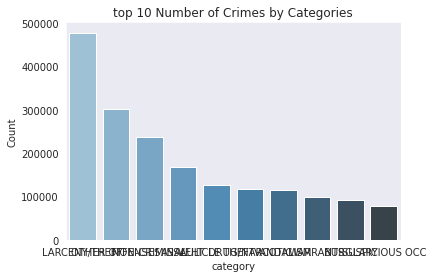

In [0]:
fig, ax = plt.subplots()
import seaborn as sns
sns.set_style("dark")
sns.barplot(x=Incidents_top_10['category'], y=Incidents_top_10['Count'],palette="Blues_d",ax=ax)
ax.set_title("top 10 Number of Crimes by Categories")
display()

In [0]:
Result_district = Column_df.groupBy('PdDistrict').count().orderBy('count', ascending=False)
display(Result_district )

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


In [0]:
incidents_district_df = Result_district.toPandas()

display(incidents_district_df)

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


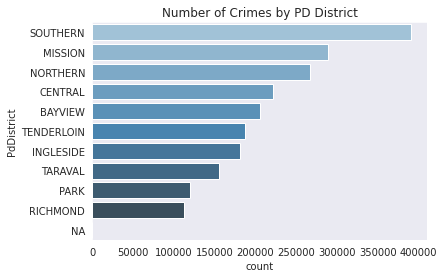

In [0]:
fig, ax = plt.subplots()
import seaborn as sns
sns.set_style("dark")
sns.barplot(x=incidents_district_df ['count'], y=incidents_district_df ['PdDistrict'],palette="Blues_d",ax=ax)
ax.set_title("Number of Crimes by PD District")
display()

In [0]:
from pyspark.sql.functions import hour, date_format, to_date,month,year
# add new columns to convert X to Longitude, Y to latitude in doubles and Date to date format
modified_df = Column_df.withColumn('Longitude', Column_df['X'].cast('double')) \
                 .withColumn('Latitude', Column_df['Y'].cast('double')) \
                 .withColumn("Incident Date",to_date(Column_df.Date, "MM/dd/yyyy")) 
# extract month and year from incident date
modified_df  = modified_df .withColumn('month',month(modified_df ['Incident Date']))
modified_df  = modified_df .withColumn('year', year(modified_df ['Incident Date']))

display(modified_df .take(3))

PdID,IncidentNumber,IncidentCode,category,Description,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,_15,_16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,_29,_30,_31,_32,_33,_34,_35,Longitude,Latitude,Incident Date,month,year
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),,,,,,,,,,,,,,,,,,,,,,-120.5,90.0,2003-09-28,9,2003
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,,,,,,,2,,,,,97,-122.428223303176,37.7818959488603,2005-06-22,6,2005
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,,,,,,,2,,,,,106,-122.410672425337,37.799788690123,2006-07-15,7,2006


In [0]:
filtered_years = [2014, 2015, 2016, 2017,2018]
filtered_years_df = modified_df[modified_df.year.isin(filtered_years)]
display(filtered_years_df.take(3))


PdID,IncidentNumber,IncidentCode,category,Description,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,_15,_16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,_29,_30,_31,_32,_33,_34,_35,Longitude,Latitude,Incident Date,month,year
18030800164070,180308001,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,04/25/2018,05:00,BAYVIEW,NONE,1400 Block of THOMAS AV,-122.38854283127222,37.72878928885484,POINT (-122.38854283127222 37.72878928885484),86,2,9,1,10,3,8,58,1,,,,,,,2,,,,,86,-122.38854283127222,37.72878928885484,2018-04-25,4,2018
18023216504170,180232165,04170,ASSAULT,FALSE IMPRISONMENT,Saturday,03/24/2018,07:00,MISSION,NONE,MISSION ST / 20TH ST,-122.41905269434928,37.75863240515618,POINT (-122.41905269434928 37.75863240515618),53,3,2,20,2,4,7,28859,19,13,,15,3,15,,2,,,3,,53,-122.41905269434928,37.75863240515618,2018-03-24,3,2018
16028516271000,160285162,71000,NON-CRIMINAL,LOST PROPERTY,Tuesday,03/01/2016,00:01,MISSION,NONE,2200 Block of MARKET ST,-122.43195768519577,37.76493571896795,POINT (-122.43195768519577 37.76493571896795),38,3,5,5,15,4,5,28862,3,,,,5,,9,1,,,5,,38,-122.43195768519577,37.76493571896795,2016-03-01,3,2016


In [0]:
Year_Monthly_df = filtered_years_df.groupby(['month','year']).count().orderBy('year','month')
display(Year_Monthly_df)

month,year,count
1,2014,12373
2,2014,11124
3,2014,12407
4,2014,11908
5,2014,11840
6,2014,11499
7,2014,12281
8,2014,12990
9,2014,12081
10,2014,12896


In [0]:
from pyspark.sql.functions import to_timestamp
# add new columns to convert Time to hour format
Modified_time_df = modified_df.withColumn('Incident Time', to_timestamp(modified_df['Time'],'HH:mm')) 
# extract hour from incident time
Modified_time_df = Modified_time_df.withColumn('Hour',hour(Modified_time_df['Incident Time']))

display(Modified_time_df.take(3))

PdID,IncidentNumber,IncidentCode,category,Description,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,_15,_16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,_29,_30,_31,_32,_33,_34,_35,Longitude,Latitude,Incident Date,month,year,Incident Time,Hour
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),,,,,,,,,,,,,,,,,,,,,,-120.5,90.0,2003-09-28,9,2003,1970-01-01T10:00:00.000+0000,10
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,,,,,,,2,,,,,97,-122.428223303176,37.7818959488603,2005-06-22,6,2005,1970-01-01T12:20:00.000+0000,12
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,,,,,,,2,,,,,106,-122.410672425337,37.799788690123,2006-07-15,7,2006,1970-01-01T00:55:00.000+0000,0


In [0]:
from pyspark.sql import functions as F
District_yearly_df = Modified_time_df.groupby('PdDistrict','year').count().orderBy('year','count',ascending = False)
display(District_yearly_df) 

PdDistrict,year,count
SOUTHERN,2018,8438
MISSION,2018,6329
NORTHERN,2018,6095
CENTRAL,2018,6014
BAYVIEW,2018,3869
INGLESIDE,2018,3525
TARAVAL,2018,3225
TENDERLOIN,2018,2806
RICHMOND,2018,2411
PARK,2018,2347


In [0]:
Modified_time_df.groupby('PdDistrict').count().orderBy('count',ascending = False).show()

+----------+------+
|PdDistrict| count|
+----------+------+
|  SOUTHERN|390692|
|   MISSION|288985|
|  NORTHERN|266435|
|   CENTRAL|221923|
|   BAYVIEW|205480|
|TENDERLOIN|186954|
| INGLESIDE|181092|
|   TARAVAL|155461|
|      PARK|119698|
|  RICHMOND|112804|
|        NA|     1|
+----------+------+



In [0]:
total_count = Modified_time_df.groupby('PdDistrict').count().orderBy('count',ascending = False).head(5)
Top5_Districts = [total_count[i][0] for i in range(5)]
Top5_Districts

Out[23]: ['SOUTHERN', 'MISSION', 'NORTHERN', 'CENTRAL', 'BAYVIEW']

In [0]:
# number of crimes in each district by hour
incidents_per_hour = Modified_time_df.filter(Modified_time_df.PdDistrict.isin(Top5_Districts)).groupby('PdDistrict','Hour').count().orderBy('PdDistrict','Hour')
display(incidents_per_hour)

PdDistrict,Hour,count
BAYVIEW,0,9732
BAYVIEW,1,4947
BAYVIEW,2,4103
BAYVIEW,3,3024
BAYVIEW,4,2399
BAYVIEW,5,2285
BAYVIEW,6,3150
BAYVIEW,7,5873
BAYVIEW,8,8824
BAYVIEW,9,9056


In [0]:
# crime categories analysis in each districts
Incidents_percent =Modified_time_df.filter(Modified_time_df.PdDistrict.isin(Top5_Districts)).groupby('PdDistrict','Category').count().orderBy('PdDistrict','count',ascending = False)

#get top 5 crimes for each district
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col
window = Window.partitionBy(Incidents_percent['PdDistrict']).orderBy(Incidents_percent['count'].desc())
top_5_categories = Incidents_percent.select('*', rank().over(window).alias('rank')) .filter(col('rank') <= 5) 
display(top_5_categories)

PdDistrict,Category,count,rank
BAYVIEW,OTHER OFFENSES,39717,1
BAYVIEW,LARCENY/THEFT,27638,2
BAYVIEW,ASSAULT,20016,3
BAYVIEW,VEHICLE THEFT,16780,4
BAYVIEW,NON-CRIMINAL,15861,5
CENTRAL,LARCENY/THEFT,71808,1
CENTRAL,NON-CRIMINAL,28575,2
CENTRAL,OTHER OFFENSES,22241,3
CENTRAL,ASSAULT,15822,4
CENTRAL,VANDALISM,12517,5


In [0]:
display(top_5_categories)

PdDistrict,Category,count,rank
BAYVIEW,OTHER OFFENSES,39717,1
BAYVIEW,LARCENY/THEFT,27638,2
BAYVIEW,ASSAULT,20016,3
BAYVIEW,VEHICLE THEFT,16780,4
BAYVIEW,NON-CRIMINAL,15861,5
CENTRAL,LARCENY/THEFT,71808,1
CENTRAL,NON-CRIMINAL,28575,2
CENTRAL,OTHER OFFENSES,22241,3
CENTRAL,ASSAULT,15822,4
CENTRAL,VANDALISM,12517,5
